<a href="https://colab.research.google.com/github/Aisha-panigrahi/CodeAlpha_Tasks/blob/main/stock_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

# Define a list of stock tickers and their quantities in your portfolio
portfolio = {
    'AAPL': 10,  # 10 shares of Apple
    'GOOGL': 5,  # 5 shares of Google
    'MSFT': 8    # 8 shares of Microsoft
}

def fetch_stock_data(tickers):
    data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        # Fetch the current price
        price = stock.history(period='1d')['Close'].iloc[-1]
        data[ticker] = price
    return data

def calculate_portfolio_value(portfolio, stock_data):
    total_value = 0
    for ticker, quantity in portfolio.items():
        total_value += stock_data[ticker] * quantity
    return total_value

def main():
    tickers = list(portfolio.keys())
    stock_data = fetch_stock_data(tickers)

    # Display stock prices
    print("Current Stock Prices:")
    for ticker, price in stock_data.items():
        print(f"{ticker}: ${price:.2f}")

    # Calculate and display portfolio value
    portfolio_value = calculate_portfolio_value(portfolio, stock_data)
    print(f"\nTotal Portfolio Value: ${portfolio_value:.2f}")

if __name__ == "__main__":
    main()


Current Stock Prices:
AAPL: $229.00
GOOGL: $163.38
MSFT: $417.14

Total Portfolio Value: $6444.02


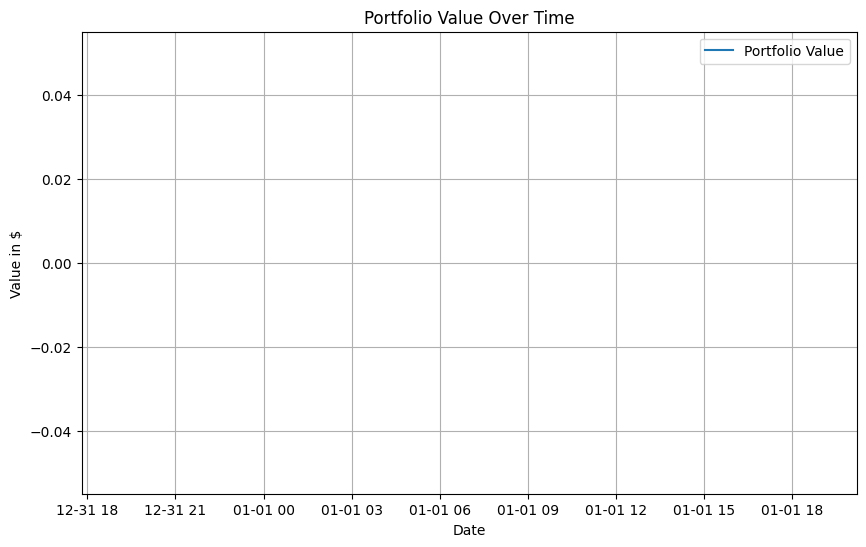

In [2]:
import matplotlib.pyplot as plt
def fetch_historical_data(tickers, start_date, end_date):
    data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date)
        data[ticker]=hist['Close']

    return data

def plot_portfolio_value(portfolio, stock_data):
    dates = stock_data[list(stock_data.keys())[0]].index
    portfolio_values=pd.Series(index=dates)

    for ticker,quantity in portfolio.items():
        portfolio_values += stock_data[ticker] * quantity

    plt.figure(figsize=(10,6))
    plt.plot(portfolio_values.index, portfolio_values, label='Portfolio Value')
    plt.xlabel('Date')
    plt.ylabel('Value in $')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    tickers = list(portfolio.keys())
    start_date = '2023-01-01'
    end_date = '2024-01-01'
    stock_data = fetch_historical_data(tickers, start_date, end_date)
    plot_portfolio_value(portfolio, stock_data)

if __name__ == "__main__":
    main()
